In [1]:
import pandas as pd

df = pd.read_csv('customer_booking.csv', encoding='latin1')
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [3]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [4]:
# Check for number of unique values for each column
df.nunique()

num_passengers             9
sales_channel              2
trip_type                  3
purchase_lead            470
length_of_stay           335
flight_hour               24
flight_day                 7
route                    799
booking_origin           104
wants_extra_baggage        2
wants_preferred_seat       2
wants_in_flight_meals      2
flight_duration           21
booking_complete           2
dtype: int64

- num_passengers = number of passengers travelling
- sales_channel = sales channel booking was made on
- trip_type = trip Type (Round Trip, One Way, Circle Trip)
- purchase_lead = number of days between travel date and booking date
- length_of_stay = number of days spent at destination
- flight_hour = hour of flight departure
- flight_day = day of week of flight departure
- route = origin -> destination flight route
- booking_origin = country from where booking was made
- wants_extra_baggage = if the customer wanted extra baggage in the booking
- wants_preferred_seat = if the customer wanted a preferred seat in the booking
- wants_in_flight_meals = if the customer wanted in-flight meals in the booking
- flight_duration = total duration of flight (in hours)
- booking_complete = flag indicating if the customer completed the booking

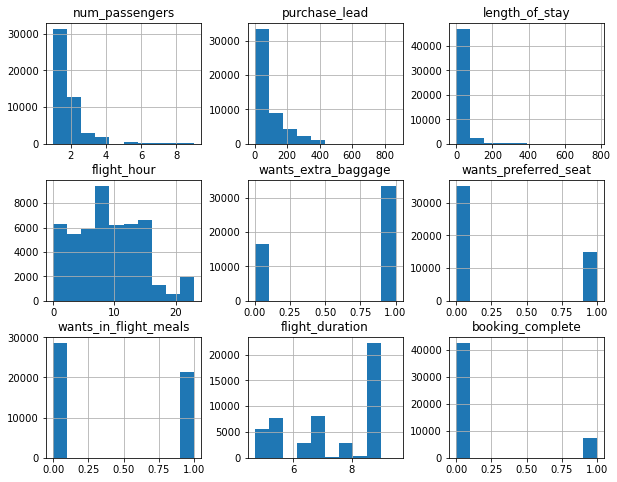

In [5]:
import matplotlib.pyplot as plt

# Visualize the distribution of numerical variables
df.hist(figsize=(10, 8))
plt.show()

From the visualisation, the columns `wants_extra_baggage`, `wants_preferred_seat`, `wants_in_flight_meals`, and `booking_complete` are distributed into 2 specific integer values; 0 and 1, indicating that they are of boolean datatype and not actually integers, therefore, they shall be converted to boolean to make them categorical columns. 

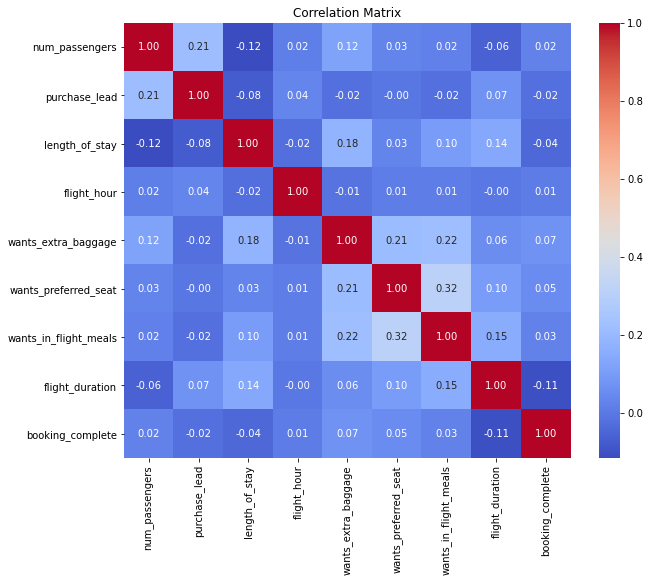

In [6]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

From above it can be noted that there is little to no correlation between the features.

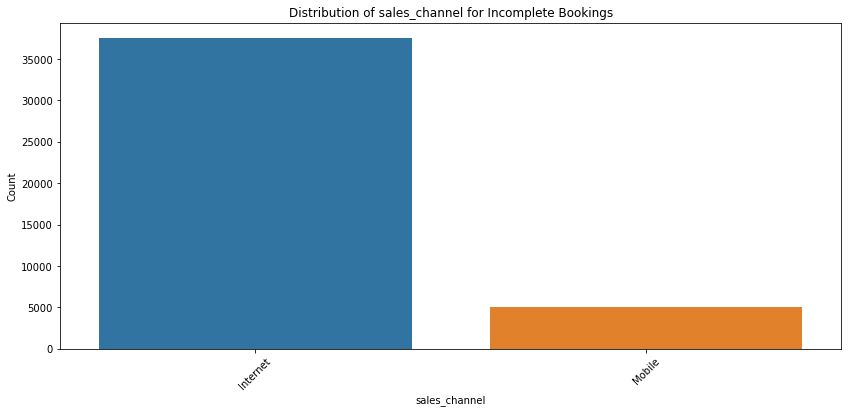

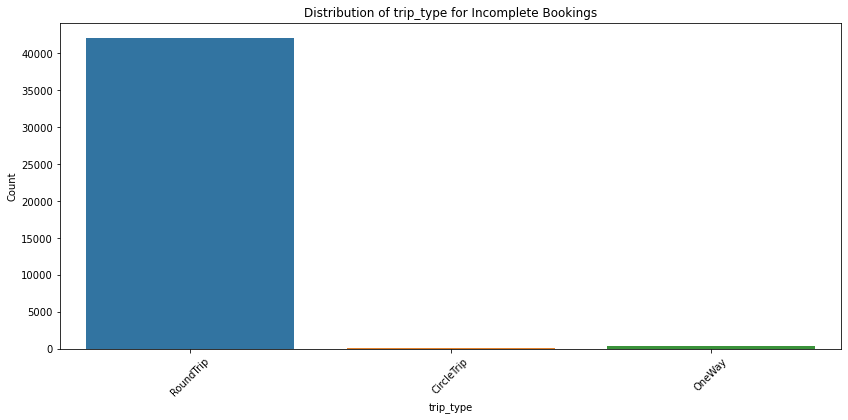

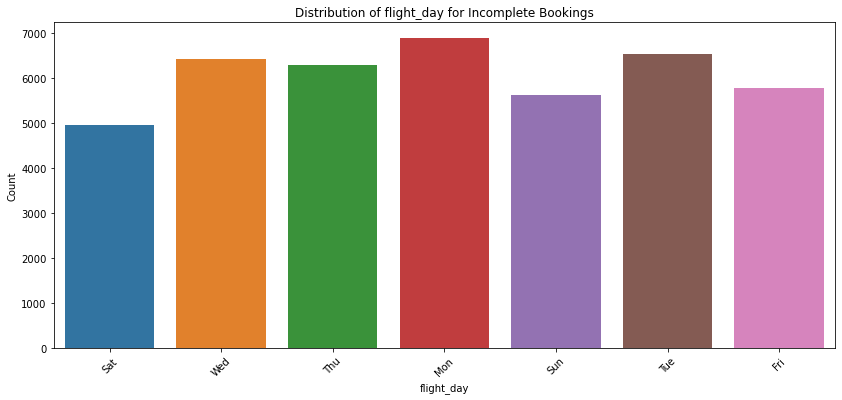

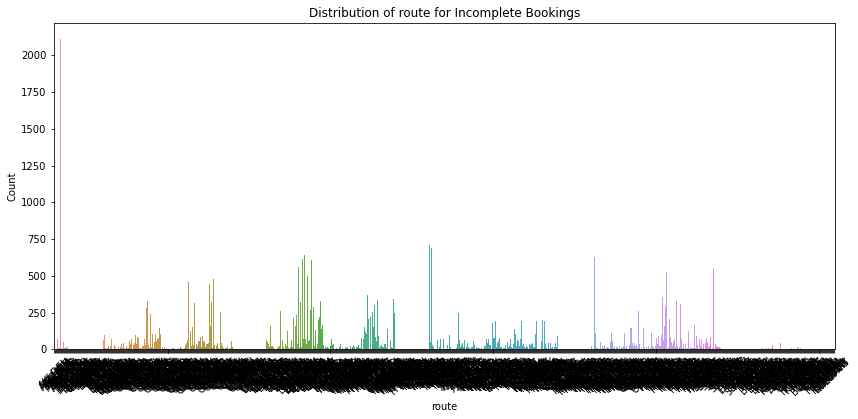

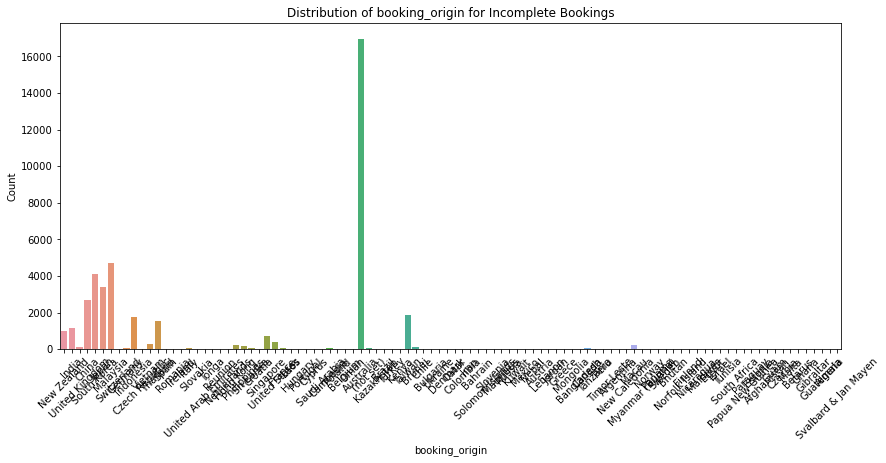

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame for incomplete bookings
incomplete_bookings = df[df['booking_complete'] == 0]

# Define a list of categorical features
categorical_features = ['sales_channel', 'trip_type', 'flight_day', '' 'route', 'booking_origin']

# Plot histograms for categorical features
for feature in categorical_features:
    plt.figure(figsize=(14, 6))
    sns.countplot(x=feature, data=incomplete_bookings)
    plt.title(f'Distribution of {feature} for Incomplete Bookings')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

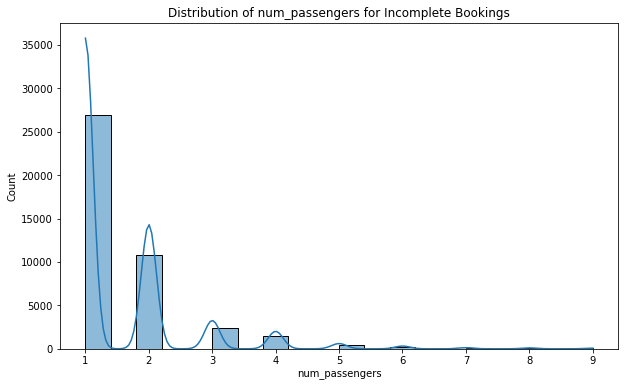

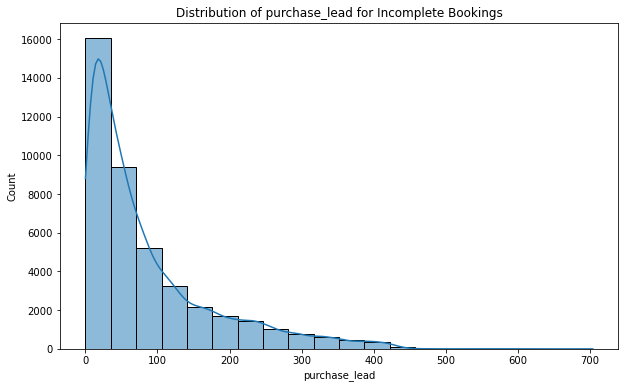

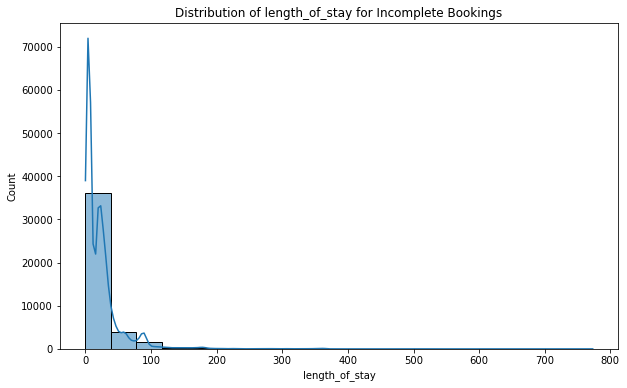

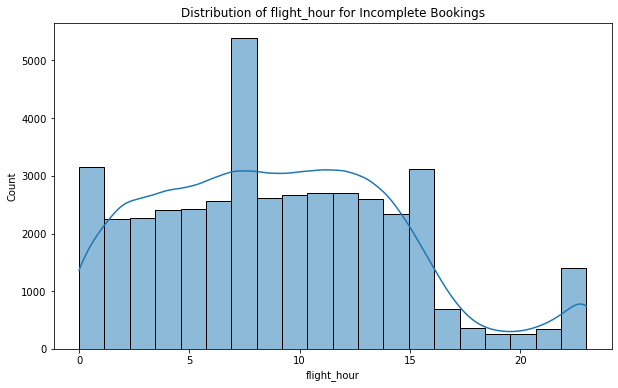

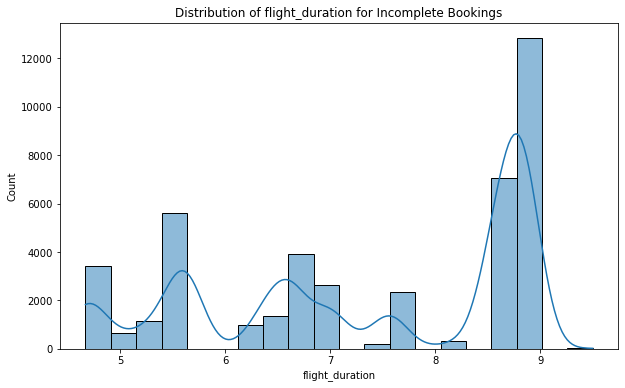

In [8]:
# Define a list of numerical features
numerical_features = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']

# Plot histograms for numerical features
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=incomplete_bookings, x=feature, bins=20, kde=True)
    plt.title(f'Distribution of {feature} for Incomplete Bookings')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

In [9]:
# Chi-square test for categorical features
from scipy.stats import chi2_contingency, f_oneway

for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df['booking_complete'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square test for {feature}:")
    print("Chi-square statistic:", chi2)
    print("P-value:", p)
    print("")

Chi-square test for sales_channel:
Chi-square statistic: 83.93114914857576
P-value: 5.1230944214045184e-20

Chi-square test for trip_type:
Chi-square statistic: 39.88685806860332
P-value: 2.181116284042331e-09

Chi-square test for flight_day:
Chi-square statistic: 16.108133180759424
P-value: 0.013185192051000815

Chi-square test for route:
Chi-square statistic: 5907.13518148551
P-value: 0.0

Chi-square test for booking_origin:
Chi-square statistic: 4677.602101395132
P-value: 0.0



In [10]:
categorical_columns = df.select_dtypes(include=['object', 'bool']).columns

df[categorical_columns].nunique()

sales_channel       2
trip_type           3
flight_day          7
route             799
booking_origin    104
dtype: int64

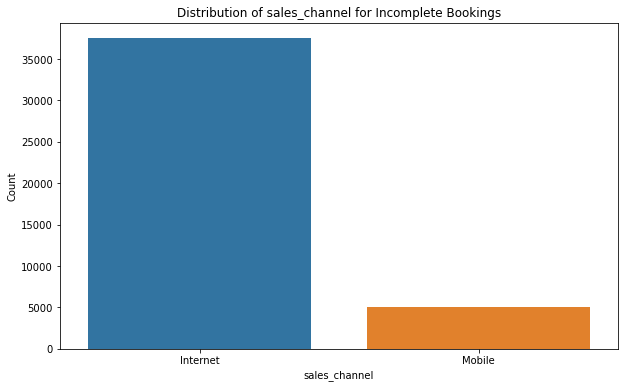

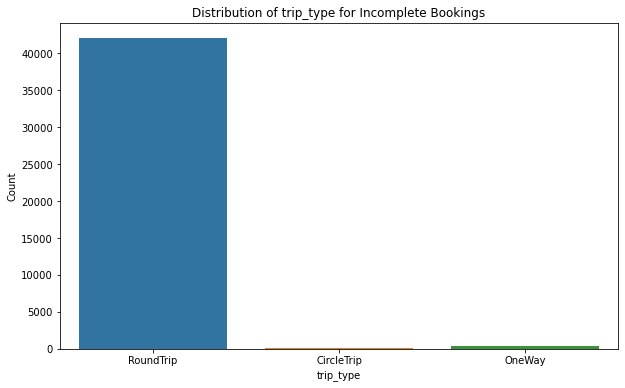

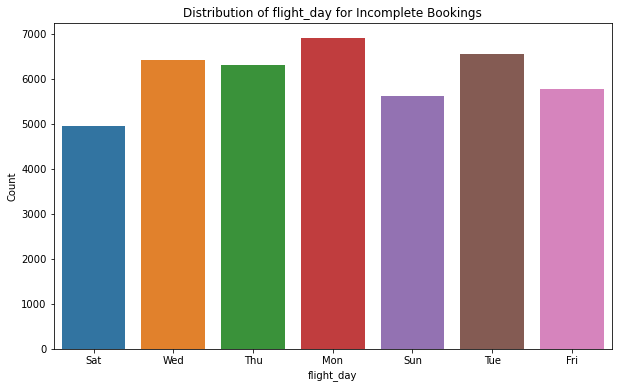

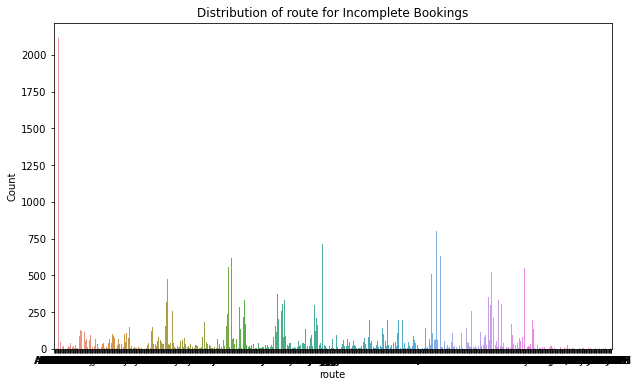

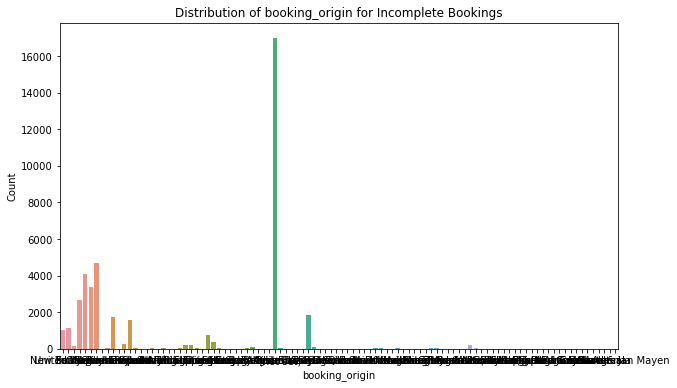

In [15]:
# Plot bar plots for numerical features
for feature in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=incomplete_bookings, x=feature)
    plt.title(f'Distribution of {feature} for Incomplete Bookings')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()